# Підготовка до лабораторної

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
forumDf = pd.read_csv('https://raw.githubusercontent.com/sbohatko/MastersLabs/main/applied%E2%80%93application-of-neural-networks/lab3/howpop_train.csv')
forumDf.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


In [11]:
forumDf = forumDf.drop(forumDf.filter(like='_lognorm').columns, axis=1)
forumDf.describe()

,post_id,content_len,comments,favs,views,votes_plus,votes_minus
count,134137.000000,134137.000000,134137.000000,134137.000000,1.341370e+05,133566.000000,133566.000000
mean,181307.054265,7516.929699,39.625994,71.999866,1.663101e+04,35.536888,8.050035
std,81766.350702,8724.771640,62.398958,145.854135,3.147982e+04,42.461073,11.398282
min,18284.000000,1.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
25%,115565.000000,2179.000000,7.000000,8.000000,2.100000e+03,11.000000,2.000000
50%,182666.000000,4949.000000,19.000000,27.000000,7.600000e+03,22.000000,5.000000
75%,257401.000000,9858.000000,48.000000,78.000000,1.870000e+04,45.000000,10.000000
max,314088.000000,352471.000000,2266.000000,8718.000000,1.730000e+06,1466.000000,445.000000


In [13]:
forumDf['published'] = pd.to_datetime(forumDf['published'])
forumDf['published'].head()

0   2008-01-01 18:19:00
1   2008-01-01 18:30:00
2   2008-01-01 18:34:00
3   2008-01-02 01:32:00
4   2008-01-02 14:34:00
Name: published, dtype: datetime64[ns]

In [15]:
forumDf['year'] = [d.year for d in forumDf.published]
forumDf['month'] = [d.month for d in forumDf.published]
forumDf['dayofweek'] = [d.isoweekday() for d in forumDf.published]
forumDf['hour'] = [d.hour for d in forumDf.published]
forumDf[['year','month','dayofweek','hour']].head()

,year,month,dayofweek,hour
0,2008,1,2,18
1,2008,1,2,18
2,2008,1,2,18
3,2008,1,3,1
4,2008,1,3,14


# 1. В якому році та місяці було найбільше публікацій?
##  Березень 2016
##  Березень 2015
##  Квітень 2015
##  Квітень 2016

In [16]:
dates_to_check = ['March 2016', 'March 2015', 'April 2015', 'April 2016']
filtered_df = forumDf[forumDf['published'].dt.strftime('%B %Y').isin(dates_to_check)]
result = filtered_df.groupby(['year', 'month']).size().reset_index(name='publications_count')
max_publications = result.loc[result['publications_count'].idxmax()]

print("Year and month with the most publications:")
print(max_publications)

Year and month with the most publications:
year                  2015
month                    3
publications_count    2189
Name: 0, dtype: int64


#2. Проаналізуйте публікації в місяці з попереднього питання. Оберіть один або кілька варіантів. (всі)
## 2.1. Один або кілька днів сильно виділяються із загальної картини

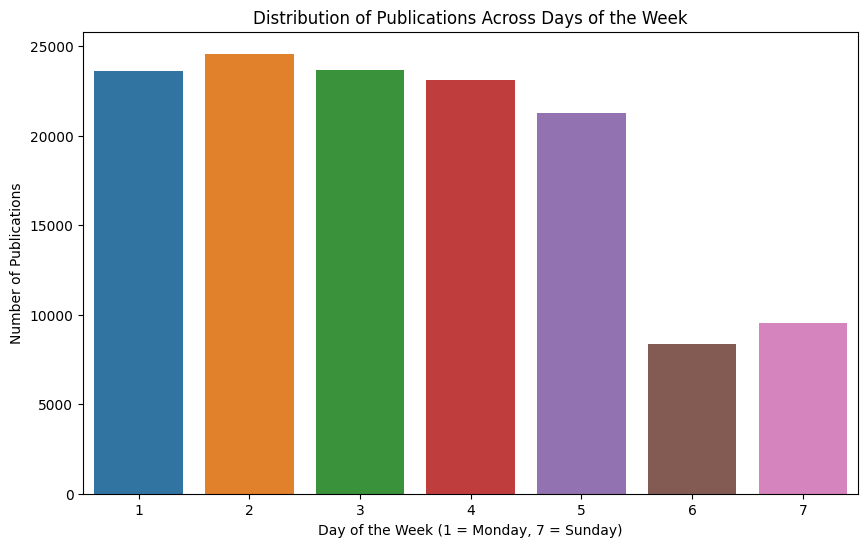

In [19]:
day_of_week_counts = forumDf.groupby('dayofweek').size()

# Plot the distribution of publications across different days of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values)
plt.title('Distribution of Publications Across Days of the Week')
plt.xlabel('Day of the Week (1 = Monday, 7 = Sunday)')
plt.ylabel('Number of Publications')
plt.show()

## 2.2. На Хабрі (habrahabr.ru) завжди більше статей, ніж на Гіктаймсі (geektimes.ru)

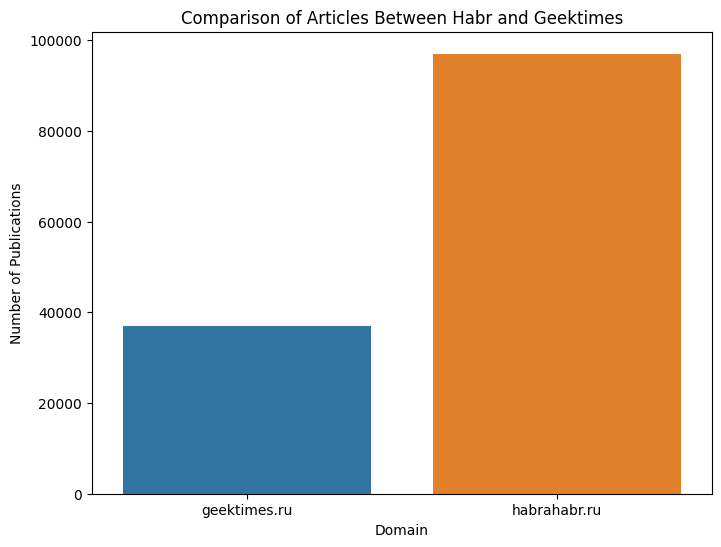

In [20]:
# Group by domain and count the number of publications
domain_counts = forumDf.groupby('domain').size()

# Plot the comparison of articles between Habr and Geektimes
plt.figure(figsize=(8, 6))
sns.barplot(x=domain_counts.index, y=domain_counts.values)
plt.title('Comparison of Articles Between Habr and Geektimes')
plt.xlabel('Domain')
plt.ylabel('Number of Publications')
plt.show()


## 2.3 По суботах на Гіктаймсі та Хабрі публікують приблизно однакове число статей

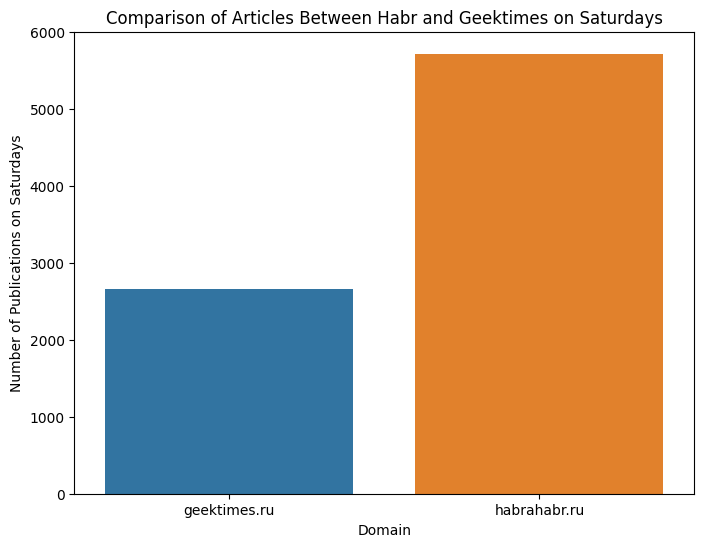

In [22]:
# Filter DataFrame for Saturdays (assuming 6 corresponds to Saturday)
saturdays_df = forumDf[forumDf['dayofweek'] == 6]

# Group by domain and count the number of publications on Saturdays
saturdays_counts = saturdays_df.groupby('domain').size()

# Plot the comparison of articles between Habr and Geektimes on Saturdays
plt.figure(figsize=(8, 6))
sns.barplot(x=saturdays_counts.index, y=saturdays_counts.values)
plt.title('Comparison of Articles Between Habr and Geektimes on Saturdays')
plt.xlabel('Domain')
plt.ylabel('Number of Publications on Saturdays')
plt.show()


# 3. Коли найкраще опублікувати статтю? Оберіть один або кілька варіантів. (я обираю всі)
### 3.1. Найбільше переглядів набирають статті, опубліковані о 12 годині дня

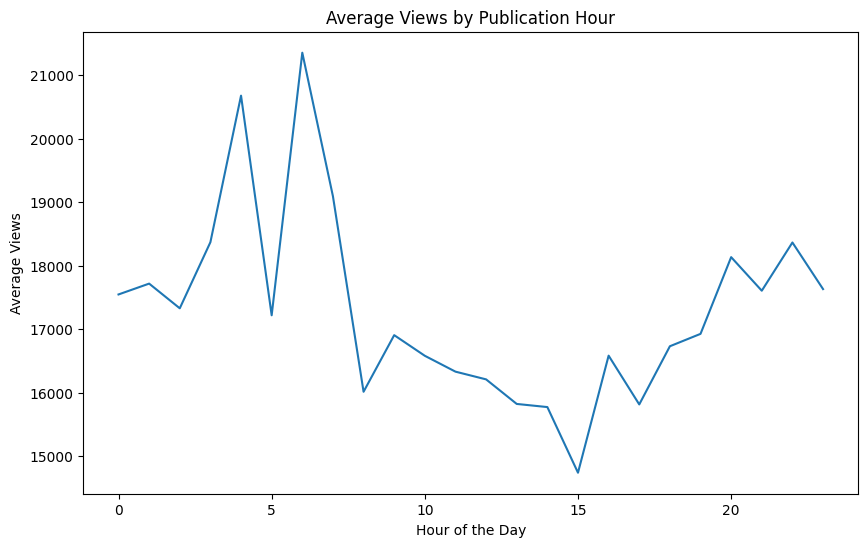

In [23]:
views_by_hour = forumDf.groupby('hour')['views'].mean()

# Plot the average views by hour
plt.figure(figsize=(10, 6))
sns.lineplot(x=views_by_hour.index, y=views_by_hour.values)
plt.title('Average Views by Publication Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Views')
plt.show()

### 3.2. В опублікованих о 10 ранку постів найбільше коментарів

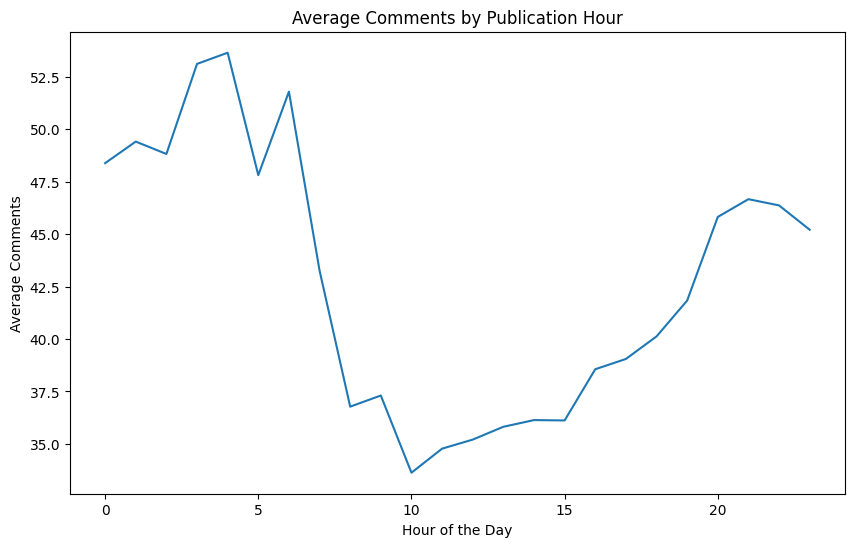

In [24]:
comments_by_hour = forumDf.groupby('hour')['comments'].mean()

# Plot the average comments by hour
plt.figure(figsize=(10, 6))
sns.lineplot(x=comments_by_hour.index, y=comments_by_hour.values)
plt.title('Average Comments by Publication Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Comments')
plt.show()


### 3.3. Найбільше переглядів набирають статті, опубліковані о 6 годині ранку

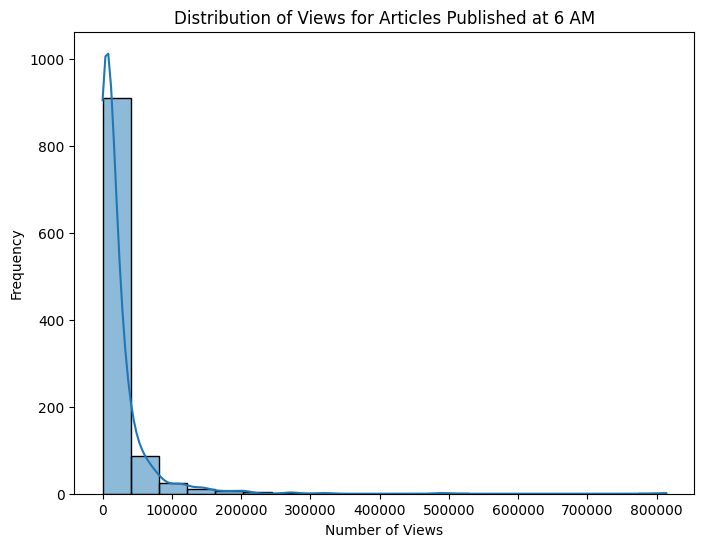

In [25]:
morning_views = forumDf[forumDf['hour'] == 6]['views']

# Plot the distribution of views for articles published at 6 AM
plt.figure(figsize=(8, 6))
sns.histplot(morning_views, bins=20, kde=True)
plt.title('Distribution of Views for Articles Published at 6 AM')
plt.xlabel('Number of Views')
plt.ylabel('Frequency')
plt.show()

### 3.4. Максимальна кількість коментарів на Гіктаймсі набрала стаття, опублікована о 9 годині вечора

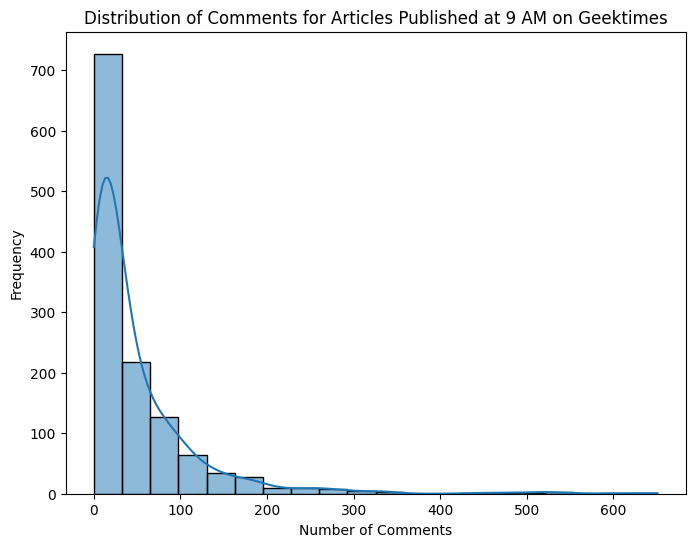

In [26]:
geektimes_comments_at_9 = forumDf[(forumDf['hour'] == 9) & (forumDf['domain'] == 'geektimes.ru')]['comments']

# Plot the distribution of comments for the article published at 9 AM on Geektimes
plt.figure(figsize=(8, 6))
sns.histplot(geektimes_comments_at_9, bins=20, kde=True)
plt.title('Distribution of Comments for Articles Published at 9 AM on Geektimes')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.show()

### 3.5. На Хабрі денні статті коментують частіше, ніж вечірні (так)

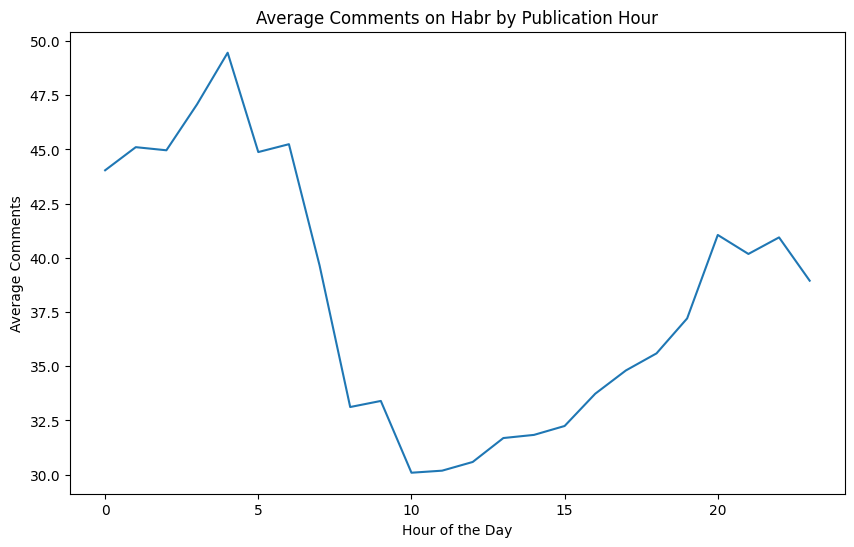

In [27]:
habr_day_vs_night = forumDf.groupby(['domain', 'hour'])['comments'].mean().reset_index()

# Filter for Habr
habr_data = habr_day_vs_night[habr_day_vs_night['domain'] == 'habrahabr.ru']

# Plot the average comments on Habr by hour
plt.figure(figsize=(10, 6))
sns.lineplot(x=habr_data['hour'], y=habr_data['comments'])
plt.title('Average Comments on Habr by Publication Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Comments')
plt.show()

#4. Кого з топ-20 авторів найчастіше мінусують?
# @Mordatyj
# @Mithgol
# @alizar <–––––
# @ilya42

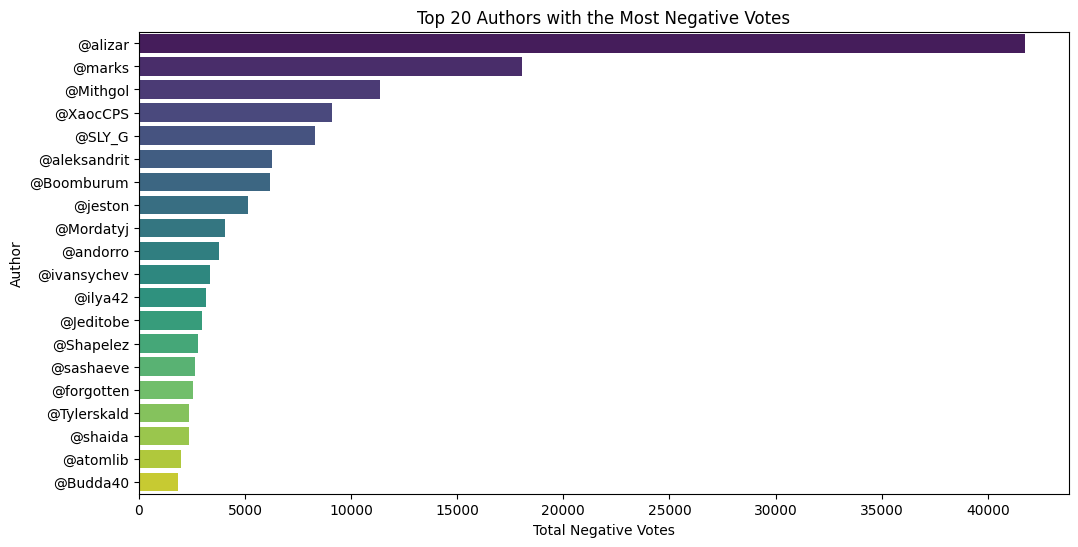

In [30]:
# Group by author and calculate the sum of negative votes
author_neg_votes = forumDf.groupby('author')['votes_minus'].sum()

# Select the top 20 authors
top_20_authors = author_neg_votes.nlargest(20)

# Plot the top 20 authors with the most negative votes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_authors.values, y=top_20_authors.index, palette='viridis')
plt.title('Top 20 Authors with the Most Negative Votes')
plt.xlabel('Total Negative Votes')
plt.ylabel('Author')
plt.show()

# 5. Порівняйте суботи і понеділки. Чи правда, що по суботах автори пишуть в основному вдень, а по понеділках – в основному ввечері?

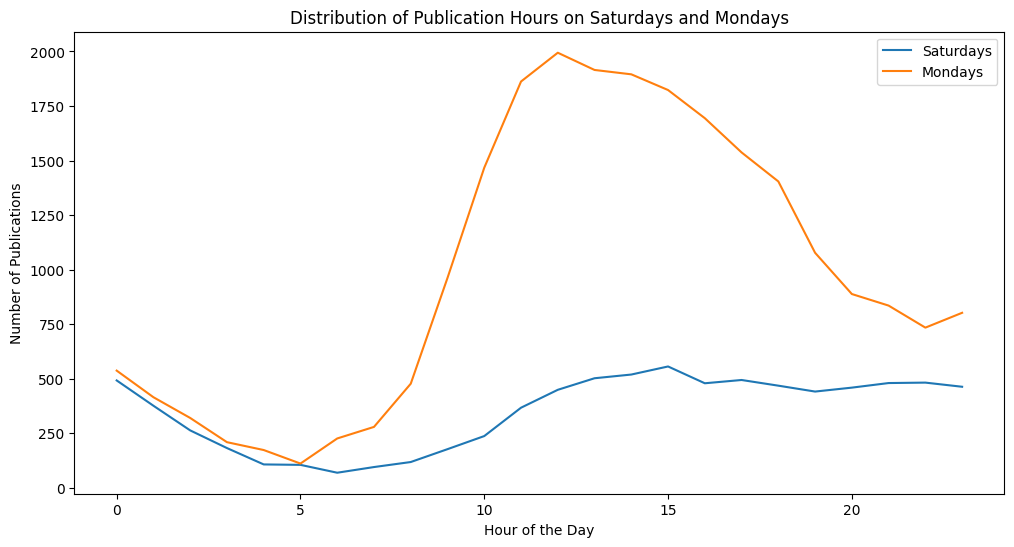

In [29]:
# Filter DataFrame for Saturdays and Mondays
saturdays_df = forumDf[forumDf['dayofweek'] == 6]
mondays_df = forumDf[forumDf['dayofweek'] == 1]

# Group by hour and count the number of publications for Saturdays and Mondays
saturdays_hour_counts = saturdays_df.groupby('hour').size()
mondays_hour_counts = mondays_df.groupby('hour').size()

# Plot the distribution of publication hours for Saturdays and Mondays
plt.figure(figsize=(12, 6))
sns.lineplot(x=saturdays_hour_counts.index, y=saturdays_hour_counts.values, label='Saturdays')
sns.lineplot(x=mondays_hour_counts.index, y=mondays_hour_counts.values, label='Mondays')
plt.title('Distribution of Publication Hours on Saturdays and Mondays')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Publications')
plt.legend()
plt.show()